## Observations and Insights 

1. Ramicane was more successful at shrinking tumours than Capomulin, Ramicane having a lower mean, median, variance, standard deviation and SEM than Capomulin.
2. With a corelation of 0.84 and an r squared of 0.709, the linear regression model "Average Tumor Volume = 0.74 * Weight - 10.5" is a good representation of the real data.
3. After Capomulin, Ramicane, Infubinol, and Ceftamin, Propriva was the next most successful drug with a lower mean and median than Infubinol and Ceftamin but a wider variation in results.

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df_combined = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
df_combined.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [3]:
# Checking the number of mice.
df_mice = df_combined.groupby("Mouse ID").count()
df_mousetotal = df_mice.count()
tot_mouse = df_mousetotal[0]
print(f"Total number of mice is: {tot_mouse}")

Total number of mice is: 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df_combined["Duplicate"] = df_combined.duplicated(subset=["Mouse ID","Timepoint"], keep=False)
df_duplicates = df_combined.loc[df_combined["Duplicate"] == True,:]
df_dupmice = df_duplicates.groupby("Mouse ID").count()
df_dupmice = df_dupmice.reset_index()

#output duplicated mice
df_dupmice["Duplicated"] = True
df_dupmice = df_dupmice.loc[:,["Mouse ID","Duplicated"]]
df_dupmice

,Mouse ID,Duplicated
0,g989,True


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
df_dupmousedata = pd.DataFrame()

# find data for each duplicated mouse (I know there's only one, it's a learning excercise)
for ind in df_dupmice.index:
    str_mouseID = df_dupmice["Mouse ID"][ind]
    df_dupmousedata = df_combined.loc[df_combined["Mouse ID"] == str_mouseID,:]
    
# output data for duplicated mice   
df_dupmousedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
908,g989,Propriva,Female,21,26,0,45.000000,0,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean = df_combined

#remove data for each duplicated mouse
for ind in df_dupmice.index:
    str_mouseID = df_dupmice["Mouse ID"][ind]
    df_clean = df_clean.loc[df_clean["Mouse ID"] != str_mouseID,:]
    
df_clean.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [7]:
# Checking the number of mice in the clean DataFrame.
df_cleanmice = df_clean.groupby("Mouse ID").count()
df_cleantotal = df_cleanmice.count()
tot_cleanmice = df_cleantotal[0]
print(f"Total number of unduplicated mice is: {tot_cleanmice}")

Total number of unduplicated mice is: 248


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
group_regimen = df_clean.groupby("Drug Regimen")

#calculate statistics
df_regimenmean = group_regimen["Tumor Volume (mm3)"].mean()
df_regimenmedian = group_regimen["Tumor Volume (mm3)"].median()
df_regimenvar = group_regimen["Tumor Volume (mm3)"].var()
df_regimenstd = group_regimen["Tumor Volume (mm3)"].std()
df_regimensem = group_regimen["Tumor Volume (mm3)"].sem()

#rename columns
df_regimenmean = df_regimenmean.rename("Mean")
df_regimenmedian = df_regimenmedian.rename("Median")
df_regimenvar = df_regimenvar.rename("Variance")
df_regimenstd = df_regimenstd.rename("Standard Dev")
df_regimensem = df_regimensem.rename("Std Err of the Mean")

#create summary dataframe
df_regimensummary = pd.merge(df_regimenmean, df_regimenmedian, on="Drug Regimen")
df_regimensummary = pd.merge(df_regimensummary, df_regimenvar, on="Drug Regimen")
df_regimensummary = pd.merge(df_regimensummary, df_regimenstd, on="Drug Regimen")
df_regimensummary = pd.merge(df_regimensummary, df_regimensem, on="Drug Regimen")
df_regimensummary

,Mean,Median,Variance,Standard Dev,Std Err of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

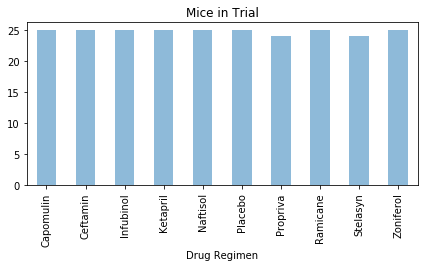

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
df_totmice = df_clean.groupby(["Mouse ID","Drug Regimen"],as_index=False).count()
df_totdrug = df_totmice.groupby(["Drug Regimen"],as_index=False).count()
df_barplot = df_totdrug[["Mouse ID","Drug Regimen"]]
df_barplot = df_barplot.set_index("Drug Regimen")
df_barplot = df_barplot.rename(columns={"Mouse ID":"Number of Mice"})
df_barplot.plot(kind="bar", figsize=(7,3), legend=False, title="Mice in Trial", alpha=0.5)


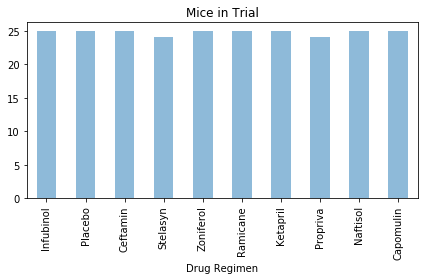

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plt.hist(df_totmice['Drug Regimen'],rwidth=0.5,align="mid",alpha=0.5)
plt.xlabel('Drug Regimen')
plt.title("Mice in Trial")
plt.xlim(0,9)
bin_xtick = np.arange(0.45,9.45,(9/10))
plt.xticks(bin_xtick,rotation="vertical")
plt.tight_layout()
plt.show()

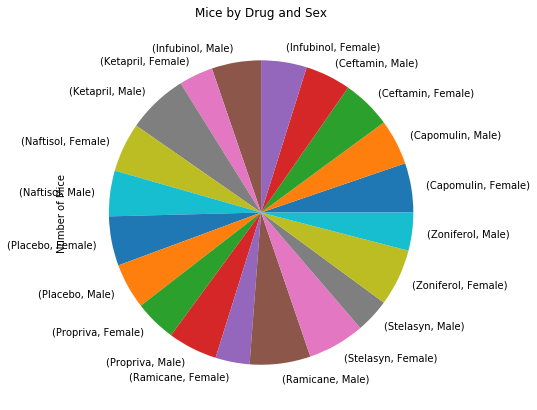

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

df_micesex = df_clean.groupby(["Drug Regimen","Sex","Mouse ID"],as_index=False).count()
df_drugsex = df_micesex.groupby(["Drug Regimen","Sex"]).count()
df_drugsex = df_drugsex.rename(columns={"Mouse ID":"Number of Mice"})
df_drugsex = df_drugsex["Number of Mice"]
df_drugsex.plot(kind="pie", figsize=(7,7), legend=False, title="Mice by Drug and Sex")

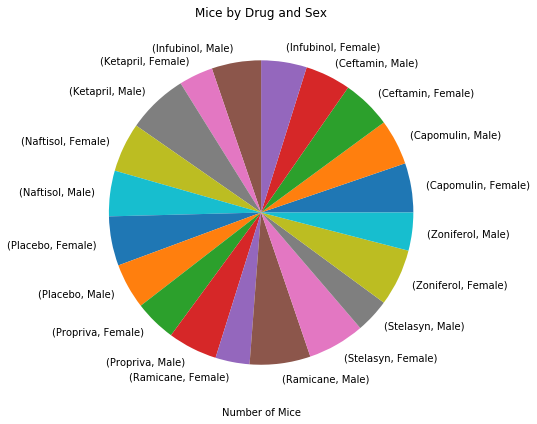

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
df_drugsex = df_micesex.groupby(["Drug Regimen","Sex"],as_index=False).count()
df_drugsex = df_drugsex.rename(columns={"Mouse ID":"Number of Mice"})
plt.figure(figsize=(7,7))
plt.pie(df_drugsex['Number of Mice'], labels="("+df_drugsex["Drug Regimen"]+", "+df_drugsex["Sex"]+")")
plt.xlabel('Number of Mice')
plt.title("Mice by Drug and Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
df_treatments = df_clean.loc[(df_clean["Drug Regimen"] == "Capomulin") | 
                             (df_clean["Drug Regimen"] == "Ramicane") |
                             (df_clean["Drug Regimen"] == "Infubinol") |
                             (df_clean["Drug Regimen"] == "Ceftamin"),: ]

# Start by getting the last (greatest) timepoint for each mouse
group_mice = df_treatments.groupby("Mouse ID")
df_maxtime = group_mice["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df_lasttumorvol = pd.merge(df_maxtime, df_clean, how="inner", on=["Mouse ID", "Timepoint"])
df_lasttumorvolmouse = df_lasttumorvol[["Mouse ID","Tumor Volume (mm3)"]]
df_lasttumorvolmouse

,Mouse ID,Tumor Volume (mm3)
0,a203,67.973419
1,a251,65.525743
2,a275,62.999356
3,a411,38.407618
4,a444,43.047543
...,...,...
95,y769,68.594745
96,y793,31.896238
97,y865,64.729837
98,z578,30.638696


In [55]:
# Put treatments into a list for for loop (and later for plot labels)
list_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
dict_tumorvol = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in list_treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    df_treattumorvol = df_lasttumorvol.loc[(df_lasttumorvol["Drug Regimen"] == treatment), "Tumor Volume (mm3)"]
    list_treattumorvol = df_treattumorvol.tolist()
    
    # add subset 
    dict_tumorvol[treatment] = list_treattumorvol
    
    # Determine outliers using upper and lower bounds
    quartiles = df_treattumorvol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    meanq = quartiles[0.5]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
        
    print(f"{treatment} values above {upper_bound} could be outliers")
    print(f"The upper quartile for {treatment} is: {round(upperq, 3)}")
    print(f"The the median for {treatment} is: {round(meanq, 3)} ")
    print(f"The lower quartile for {treatment} is: {round(lowerq,3)}")
    print(f"The interquartile range for {treatment} is: {round(iqr, 3)}")
    print(f"{treatment} values below {lower_bound} could be outliers")
    for tumorvolume in list_treattumorvol:
        if (tumorvolume > upper_bound):
            print(f"A possible upper outlier is {tumorvolume}")
        elif (tumorvolume < lower_bound):
            print(f"A possible lower outlier is {tumorvolume}")
    
    print("")
    

Capomulin values above 51.83201549 could be outliers
The upper quartile for Capomulin is: 40.159
The the median for Capomulin is: 38.125 
The lower quartile for Capomulin is: 32.377
The interquartile range for Capomulin is: 7.782
Capomulin values below 20.70456164999999 could be outliers

Ramicane values above 54.30681135 could be outliers
The upper quartile for Ramicane is: 40.659
The the median for Ramicane is: 36.562 
The lower quartile for Ramicane is: 31.56
The interquartile range for Ramicane is: 9.099
Ramicane values below 17.912664470000003 could be outliers

Infubinol values above 82.74144559000001 could be outliers
The upper quartile for Infubinol is: 65.526
The the median for Infubinol is: 60.165 
The lower quartile for Infubinol is: 54.049
The interquartile range for Infubinol is: 11.477
Infubinol values below 36.83290494999999 could be outliers
A possible lower outlier is 36.321345799999996

Ceftamin values above 87.66645829999999 could be outliers
The upper quartile for C

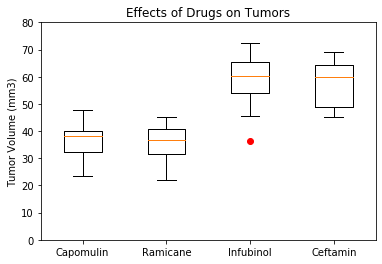

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
       
fig, ax = plt.subplots()
ax.boxplot(dict_tumorvol.values(), sym="ro")
ax.set_xticklabels(dict_tumorvol.keys())
ax.set_title("Effects of Drugs on Tumors")
ax.set_ylim([0,80])
ax.set_ylabel("Tumor Volume (mm3)")
        
plt.show()


## Line and Scatter Plots

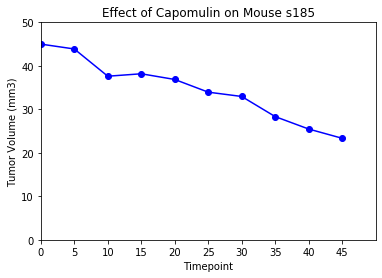

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
df_Capomulin = df_clean.loc[(df_clean["Drug Regimen"] == "Capomulin"),:]
df_mouse = df_Capomulin.iloc[0:1,0:1]
mouse = df_mouse.values.tolist()[0][0]

#get data for the mouse
df_mousedata = df_clean.loc[(df_clean["Mouse ID"] == mouse),:]
df_mousedata = df_mousedata.sort_values("Timepoint", ascending=True).reset_index()
df_mousedata
plt.plot(df_mousedata["Timepoint"], df_mousedata["Tumor Volume (mm3)"], marker ='o', color='blue', label="Mouse ID "+mouse)
plt.title("Effect of Capomulin on Mouse "+mouse)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(0,50)
plt.xlim(0,50)
bin_xtick = np.arange(0,50,5)
plt.xticks(bin_xtick)
plt.show()

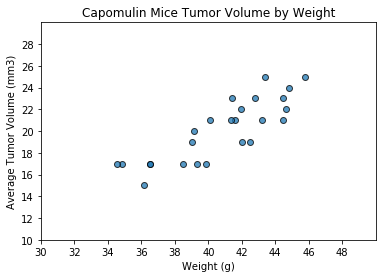

In [40]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
df_capomulin = df_clean.loc[df_clean["Drug Regimen"] == "Capomulin",:]
df_mousemean = df_capomulin.groupby(["Mouse ID"]).mean()
df_wttum = df_mousemean.loc[:,["Tumor Volume (mm3)","Weight (g)"]]
df_wttum = df_wttum.rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume (mm3)"})

plt.scatter(df_wttum["Average Tumor Volume (mm3)"], df_wttum["Weight (g)"], marker="o", edgecolors="black", alpha=0.75)
plt.title("Capomulin Mice Tumor Volume by Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.ylim(10,30)
plt.xlim(30,50)
bin_xtick = np.arange(30,50,2)
plt.xticks(bin_xtick)
bin_ytick = np.arange(10,30,2)
plt.yticks(bin_ytick)
plt.show()

## Correlation and Regression

In [56]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(df_wttum["Average Tumor Volume (mm3)"], df_wttum["Weight (g)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(df_wttum["Average Tumor Volume (mm3)"], df_wttum["Weight (g)"])
line_eq = "Average Tumor Volume = " + str(round(slope,2)) + "*Weight + " + str(round(intercept,2))
print(f"The linear regression model is '{line_eq}'")
print(f"The r-squared is: {round(rvalue**2, 3)}")

The correlation between both factors is 0.84
The linear regression model is 'Average Tumor Volume = 0.74*Weight + -10.15'
The r-squared is: 0.709
